# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [214]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [155]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [156]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt'] 

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fale old settlement
Processing Record 2 of Set 1 | papatowai
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | qaqortoq
Processing Record 5 of Set 1 | kapa'a
Processing Record 6 of Set 1 | tarko-sale
Processing Record 7 of Set 1 | el granada
Processing Record 8 of Set 1 | uturoa
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | burang
Processing Record 13 of Set 1 | peace river
Processing Record 14 of Set 1 | mogadishu
Processing Record 15 of Set 1 | chinchilla
Processing Record 16 of Set 1 | rongelap
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | puerto natales
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | chonchi
Processing Record 21 of Set 1 | markovo
Processing Record 22 of Set 1 | aasiaat
Processing

In [160]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [164]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fale old settlement,-9.3852,-171.2468,27.46,78,100,4.51,TK,1722885771
1,papatowai,-46.5619,169.4708,5.08,84,32,3.38,NZ,1722885591
2,blackmans bay,-43.0167,147.3167,10.41,74,100,1.79,AU,1722885773
3,qaqortoq,60.7167,-46.0333,9.45,69,100,1.65,GL,1722885774
4,kapa'a,22.0752,-159.3190,27.49,71,20,6.17,US,1722885519


In [174]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [176]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fale old settlement,-9.3852,-171.2468,27.46,78,100,4.51,TK,1722885771
1,papatowai,-46.5619,169.4708,5.08,84,32,3.38,NZ,1722885591
2,blackmans bay,-43.0167,147.3167,10.41,74,100,1.79,AU,1722885773
3,qaqortoq,60.7167,-46.0333,9.45,69,100,1.65,GL,1722885774
4,kapa'a,22.0752,-159.3190,27.49,71,20,6.17,US,1722885519


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

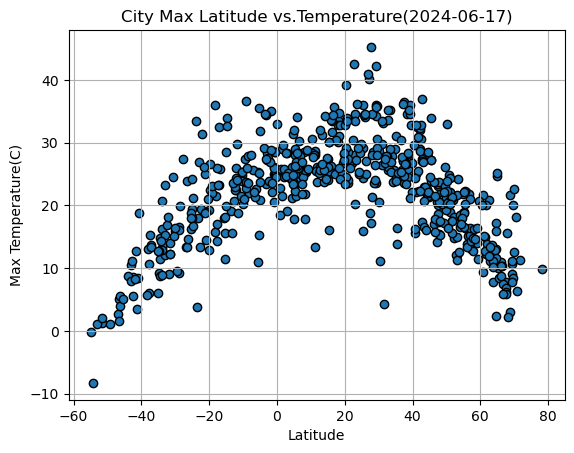

In [178]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title('City Max Latitude vs.Temperature(2024-06-17)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

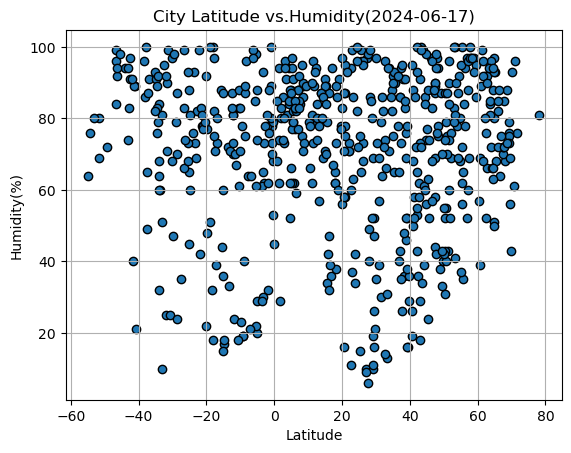

In [180]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs.Humidity(2024-06-17)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

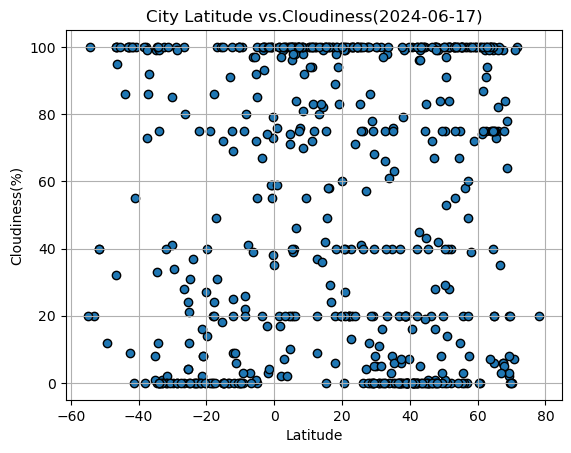

In [181]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs.Cloudiness(2024-06-17)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

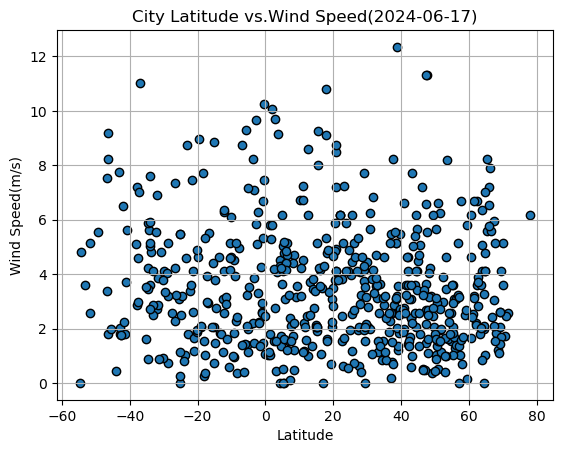

In [206]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.title('City Latitude vs.Wind Speed(2024-06-17)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [241]:
# Define a function to create Linear Regression plots
def linear_reg(x_axis, y_axis,eq_loc):  
    p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
    p_fit = p_slope * x_axis + p_int
    eq = f"y = {p_slope:.2f}x + {p_int:.2f}"
    residuals = y_axis - (p_slope * x_axis + p_int)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y_axis - np.mean(y_axis))**2)
    r_squared = 1 - (ss_res / ss_tot)

    plt.scatter(x_axis, y_axis ,marker="o")
    plt.plot(x_axis,p_fit,"--", color='red')
    plt.annotate(eq, eq_loc, fontsize=12, color='red')
    print(f"The r^2-value is: {r_squared}")

   

In [242]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,qaqortoq,60.7167,-46.0333,9.45,69,100,1.65,GL,1722885774
4,kapa'a,22.0752,-159.3190,27.49,71,20,6.17,US,1722885519
5,tarko-sale,64.9225,77.7850,11.19,80,100,4.76,RU,1722885777
6,el granada,37.5027,-122.4694,23.60,73,0,2.57,US,1722885778
8,thompson,55.7435,-97.8558,22.09,35,20,3.09,CA,1722885780


In [243]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fale old settlement,-9.3852,-171.2468,27.46,78,100,4.51,TK,1722885771
1,papatowai,-46.5619,169.4708,5.08,84,32,3.38,NZ,1722885591
2,blackmans bay,-43.0167,147.3167,10.41,74,100,1.79,AU,1722885773
7,uturoa,-16.7333,-151.4333,25.82,73,100,5.50,PF,1722885779
9,port elizabeth,-33.9180,25.5701,13.16,64,0,3.60,ZA,1722885781


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.37743816723935975


Text(0.5, 1.0, 'Latitude vs Max Temp')

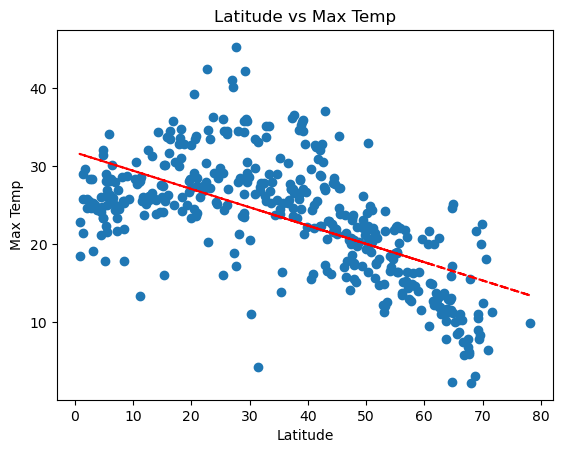

In [244]:
# Linear regression on Northern Hemisphere

linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],(10, -10))
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Latitude vs Max Temp")

The r^2-value is: 0.6457439909434528


Text(0, 0.5, 'Max Temp')

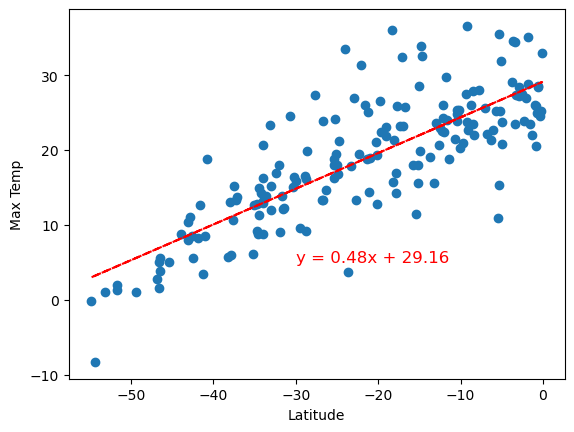

In [245]:
# Linear regression on Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],(-30, 5))
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

**Discussion about the linear relationship:** 
Latitude vs Max temp in the northern hemisphere has a negative correlation as the latitude increases the 
temperature falls and it has the highest temp at 0 latitude which is the equator. The southern hemisphere latitude vs temp graph shows that when the latitude value approaches 0, the temperature increases too as shown by the upward sloping line. 
Hence, it is proved that at latitude 0 (equator), the temperature is the highest and the temperature starts decreasing as 
it starts moving further away from 0 in both the southern and northern graphs. 


### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 3.937415874510908e-05


Text(0.5, 1.0, 'Latitude vs Humidity')

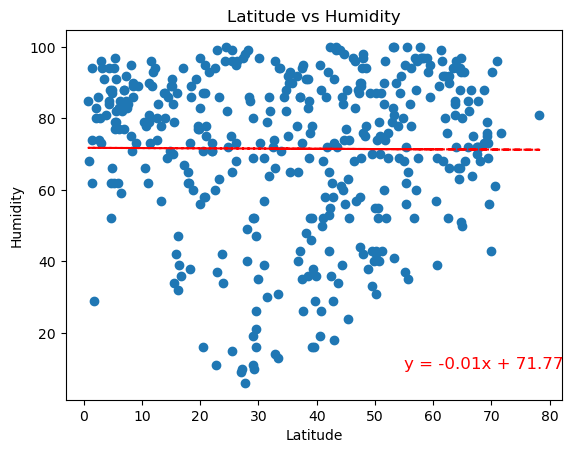

In [246]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],(55, 10))
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Latitude vs Humidity")

The r^2-value is: 0.04795050513558752


Text(0, 0.5, 'Humidity')

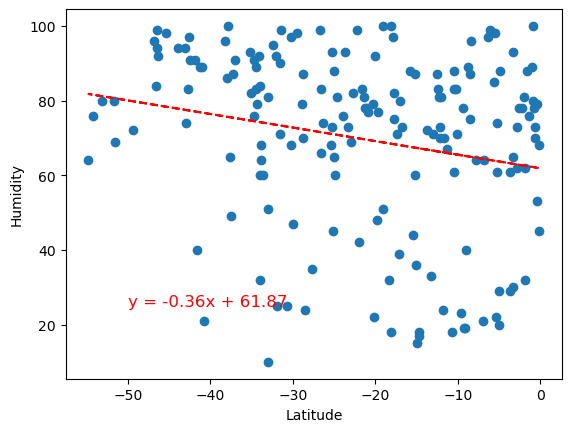

In [247]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],(-50, 25))
plt.xlabel('Latitude')
plt.ylabel('Humidity')

**Discussion about the linear relationship:** 
Relationship beetween humidity and latitude in the northern is almost 0 as the horizontal line y=-0.01x + 71.77 indicates showing no correlation. However, there is a weak negative correlation seen in the southern hemisphere where the line y=-0.36 + 61.87 indicates that as you move further to the equator at latitude 0, the humdity starts decreaasing. 

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.017805707564536144


Text(0.5, 1.0, 'Latitude vs Cloudliness')

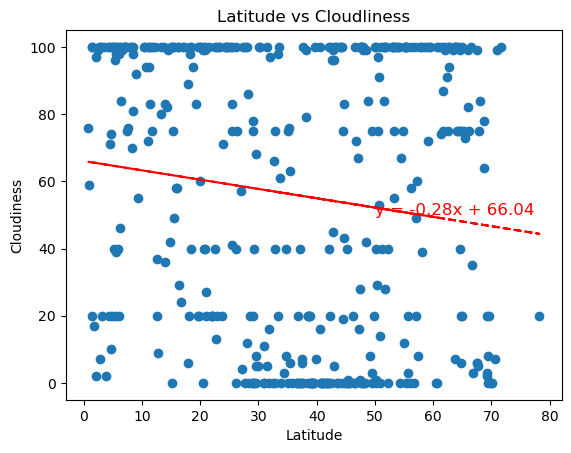

In [248]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],(50, 50))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Latitude vs Cloudliness")

The r^2-value is: 0.00017559302950698186


Text(0.5, 1.0, 'Latitude vs Cloudliness')

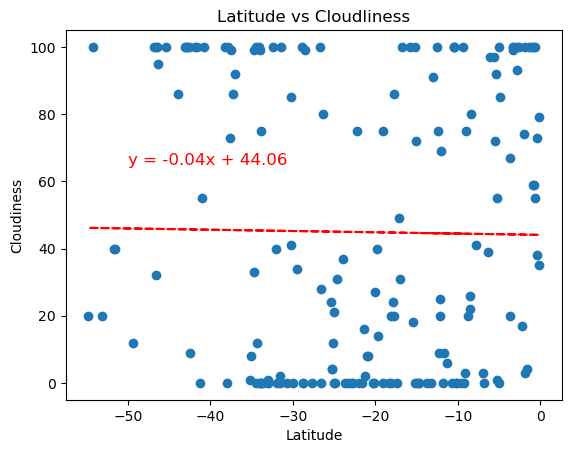

In [249]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],(-50, 65))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Latitude vs Cloudliness")

**Discussion about the linear relationship:** 
The cloudliness in the northern hemisphere is highest at the equator around 65 humidity and starts decreasing as you move towards north. However, in the southern hemisphere there is barely any correlation the cloudliness almost stays at the same level towards the equator and same when it moves south. 

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0046354144248108575


Text(0.5, 1.0, 'Latitude vs Wind Speed')

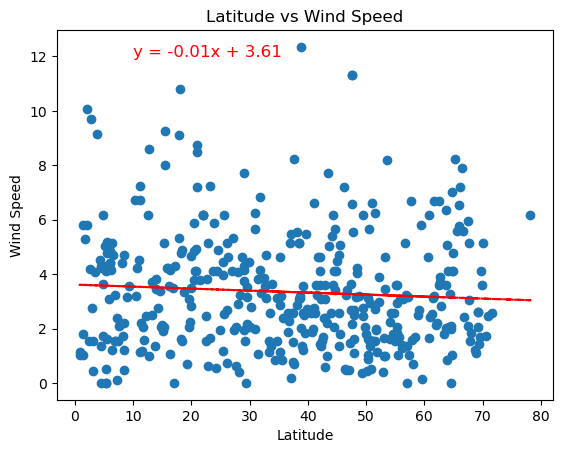

In [250]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],(10, 12))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Latitude vs Wind Speed")

The r^2-value is: 0.0019308011635807976


Text(0.5, 1.0, 'Latitude vs Wind Speed')

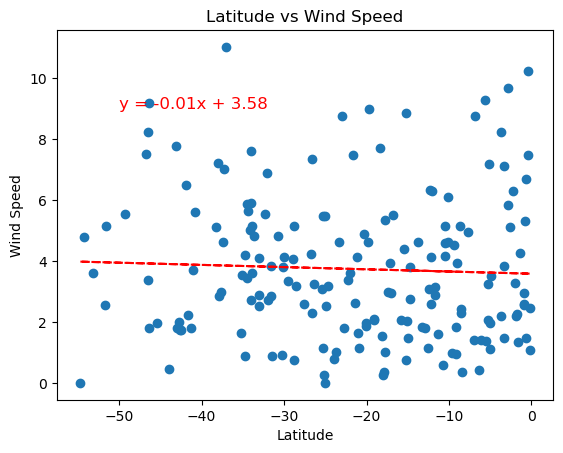

In [251]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],(-50, 9))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Latitude vs Wind Speed")

**Discussion about the linear relationship:** 
Wind speed in the northern hemisphere is higher at the equator (latitude 0) and decreases at a very slow rate as it moves north. However, it is the opposite for southern hemisphere as the wind speed is lowest at the equator (latitude 0) and slowly increases as it moves south. Overall, there is little to no correlation between wind speed and latitude in both the hemispheres. 

Overall, looking at the 8 graphs above. It illustrates that the temperate increases as you move closer to the equator. The humidity decreases when you move from south to the equator and the humidity level almost stays the same when you move from north to the equator. The cloudliness is the opposite to the humidity, it stays at the same level when you move from south to the equator and decreases when you move north. Lastly, the wind speed barely has any changes when it moves from the equator to north and south. 